In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [183]:
# Creating dataframe named df

df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [184]:
# Checking for different informations in the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [185]:
# Checking for total number of rows and columns

df.shape

(10886, 12)

In [186]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [187]:
# Checking for null values

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Data has no null values.


In [188]:
# Datetime column is in object data type, converting it to datetime

df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

In [189]:
# Checking for the duplicated rows

df.duplicated().sum()

np.int64(0)

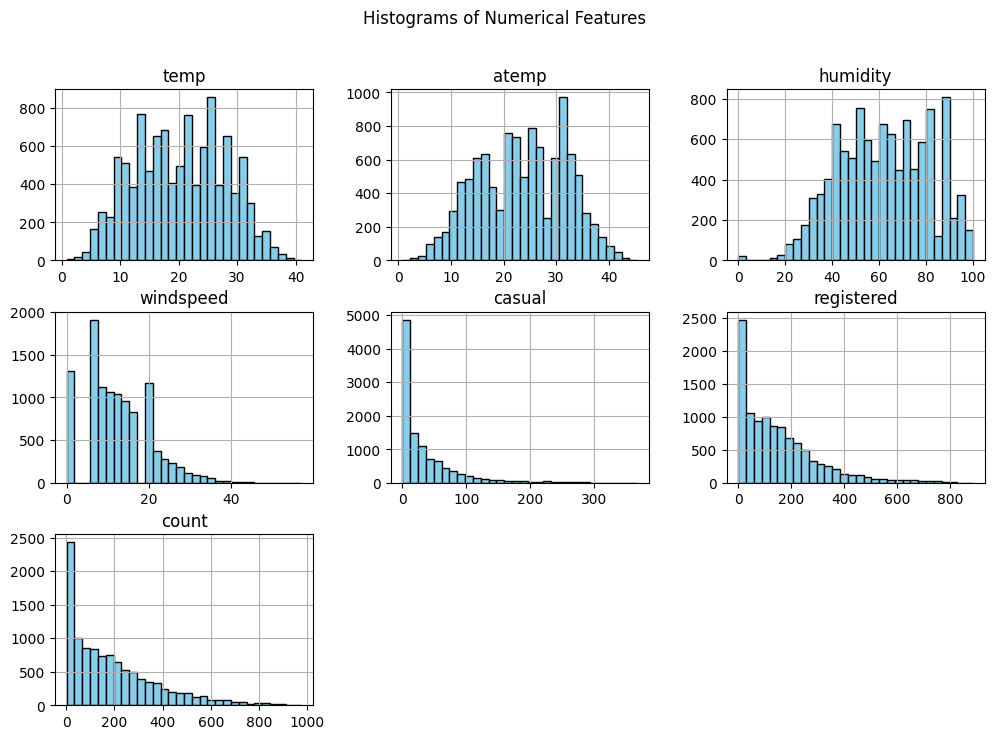

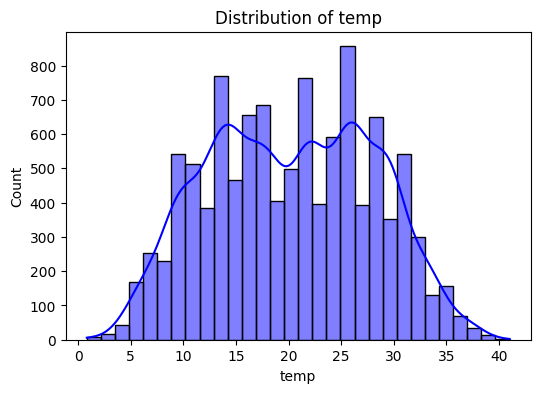

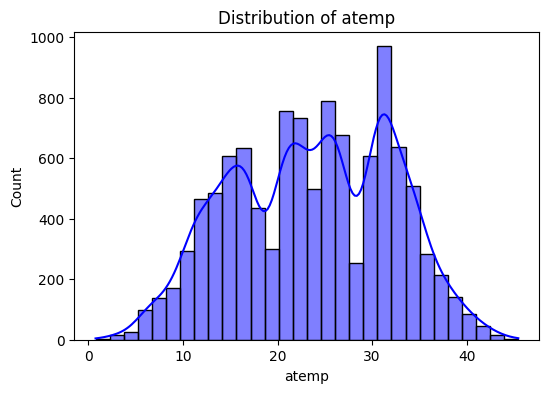

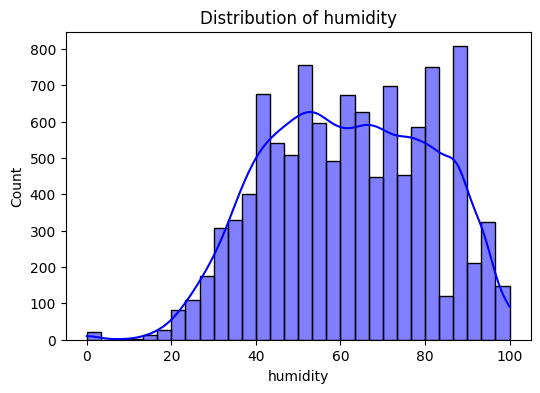

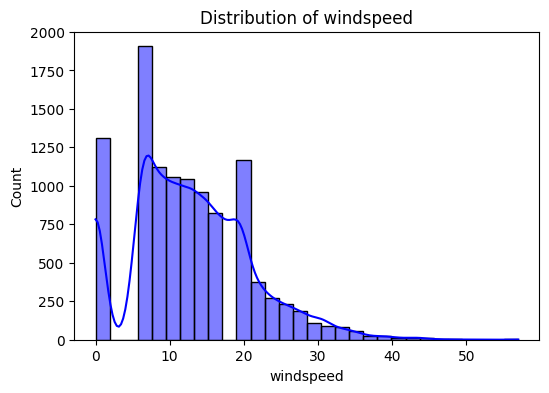

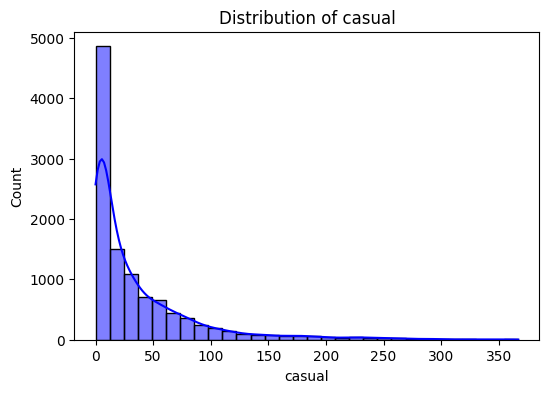

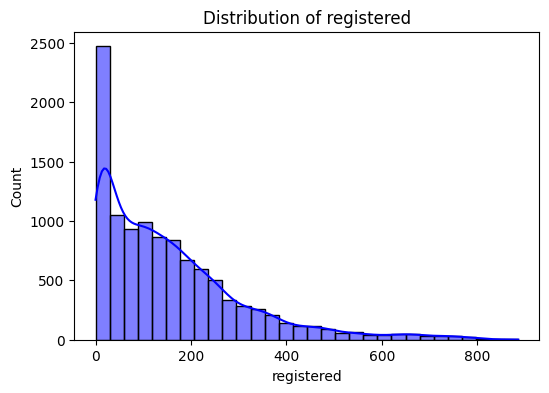

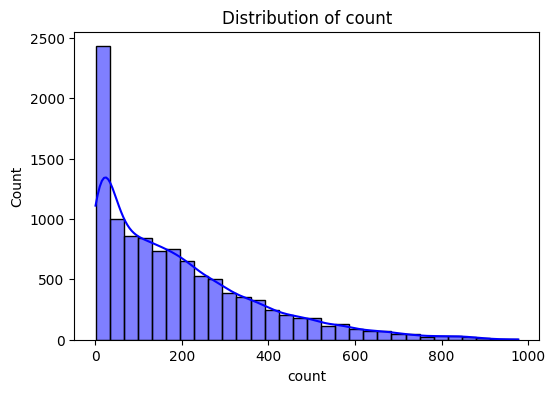

In [190]:
# Checking for the distribution on the different columns, categorized into 2 groups(Categorical and Numerical)

numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Plot histograms for numerical variables
df[numerical_cols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Plot distribution plots (distplots)
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()



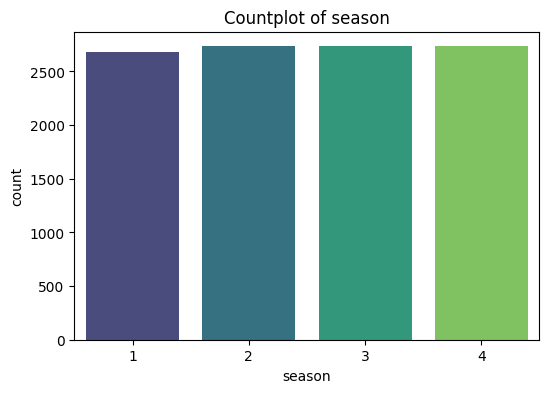

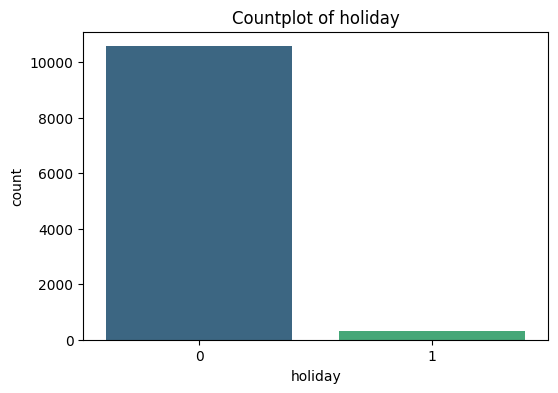

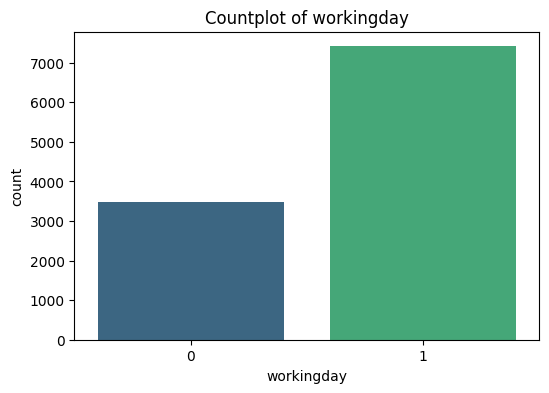

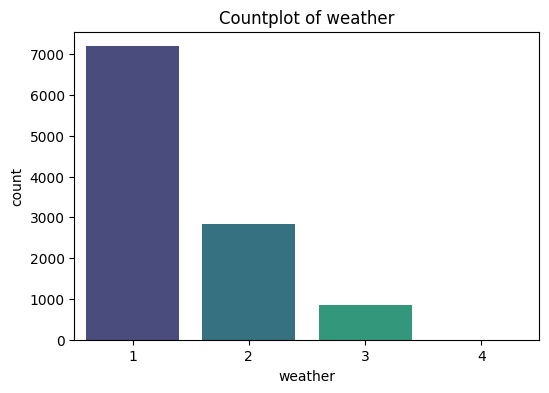

In [191]:
# Countplots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.show()



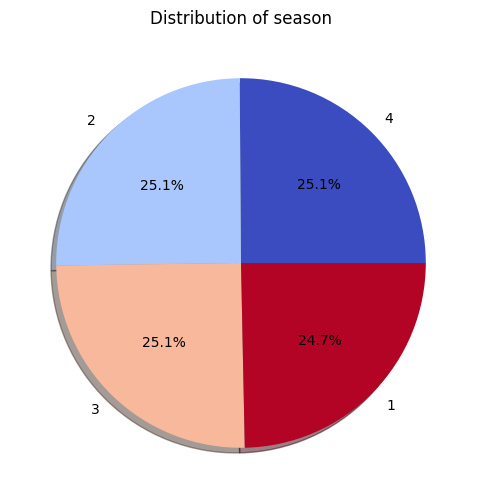

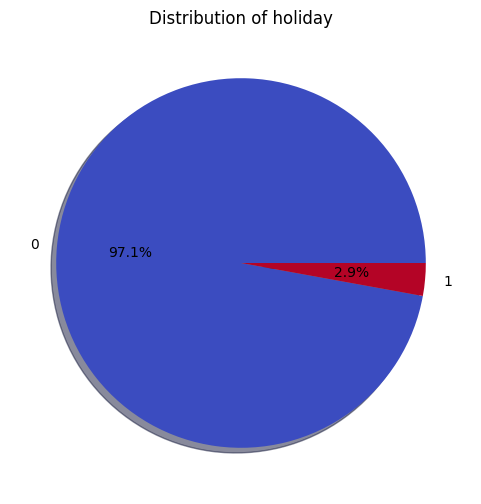

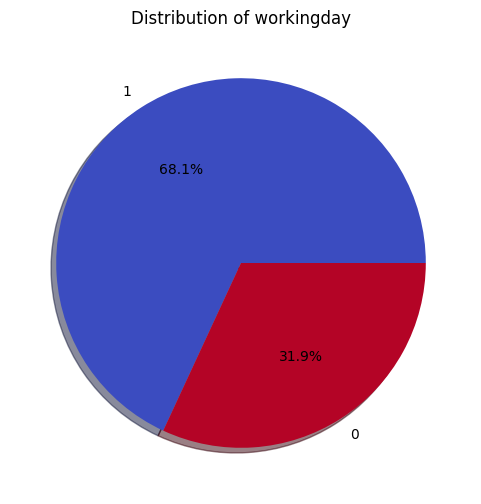

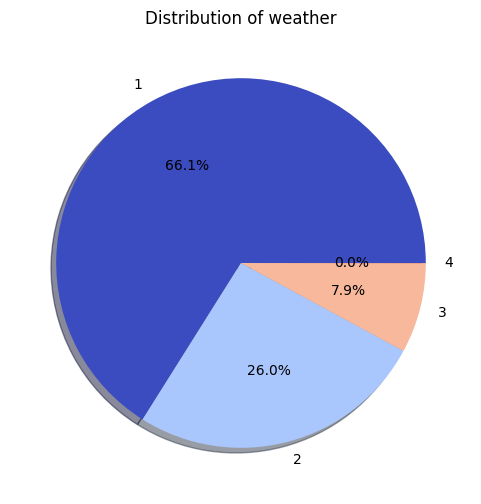

In [192]:
# Pie charts for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', cmap="coolwarm", shadow=True)
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()

### Checking for Outliers in the numerical columns.

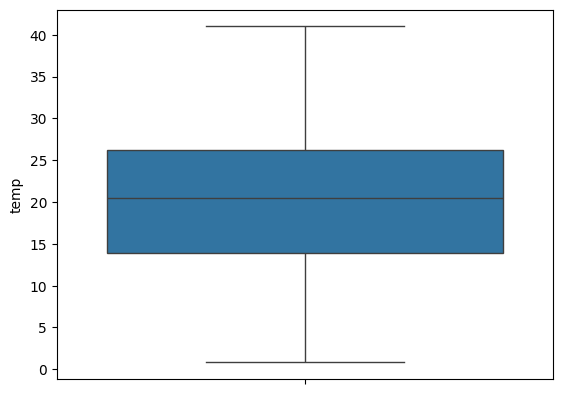

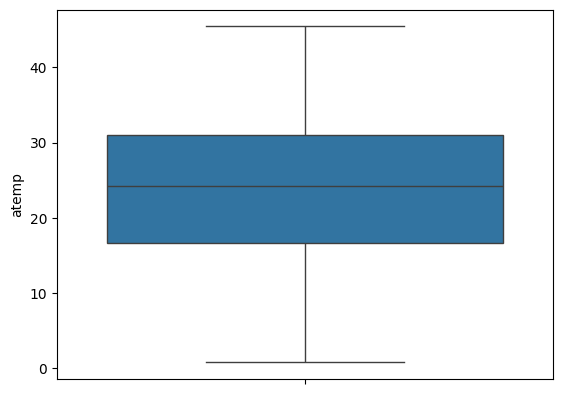

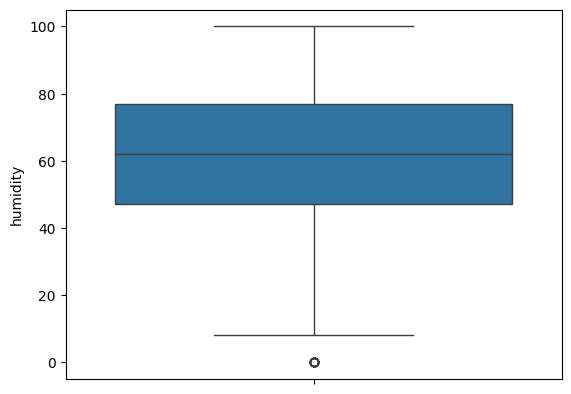

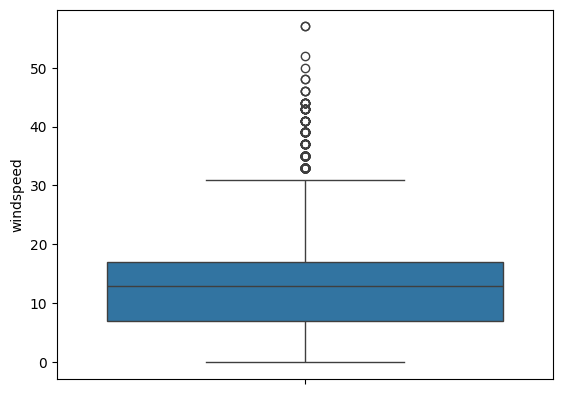

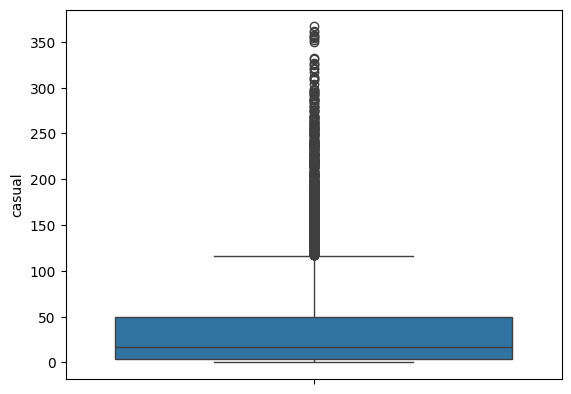

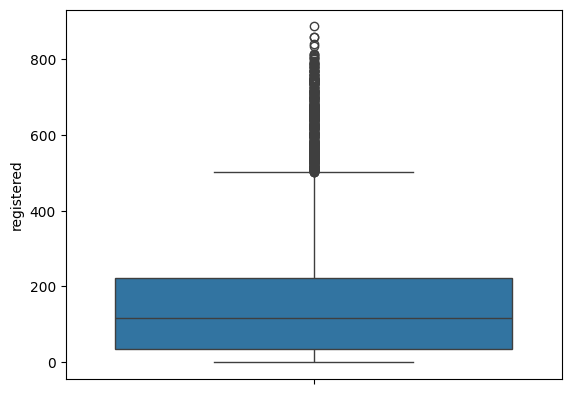

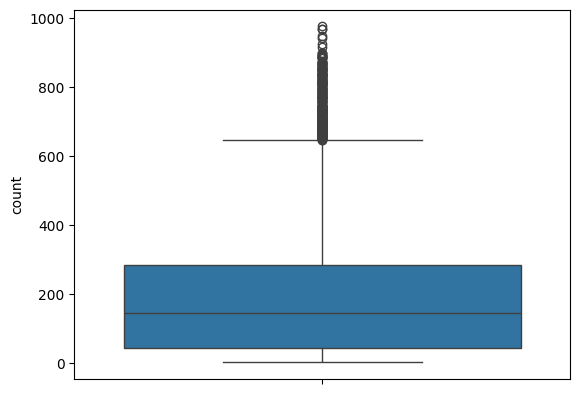

In [193]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.show()

### Count, windspeed, casual and registered have outliers. Will remove them.


In [194]:
outlier_cols = ['count', 'windspeed', 'casual', 'registered']

# Fixing column data types and drop NaNs
for col in outlier_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    df[col].dropna(inplace=True)

In [195]:

for col in outlier_cols:
    Q1 = np.percentile(df[col].dropna(), 25)  # 25th percentile
    Q3 = np.percentile(df[col].dropna(), 75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

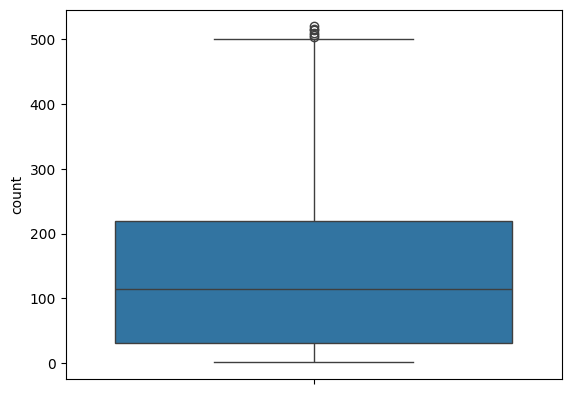

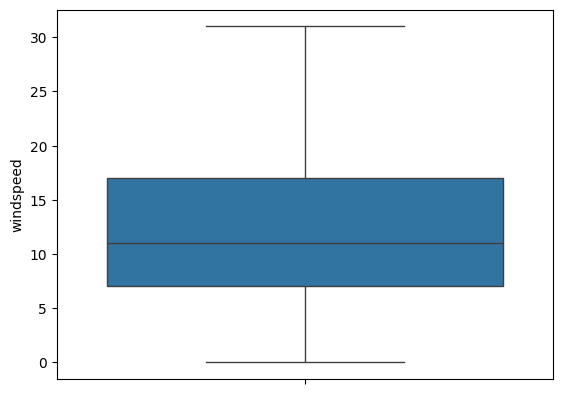

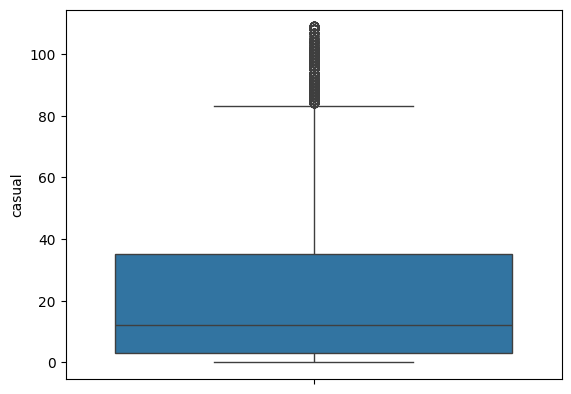

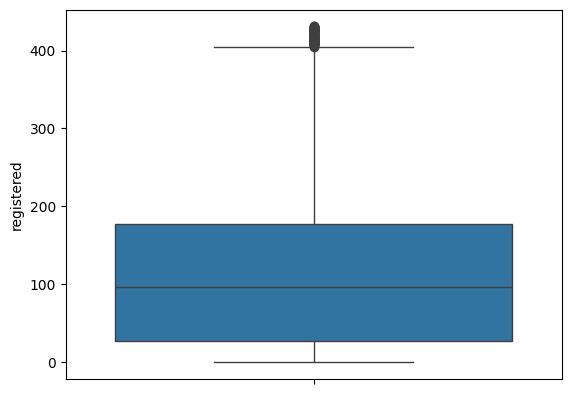

In [196]:
for i in outlier_cols:
    sns.boxplot(df[i])
    plt.show()

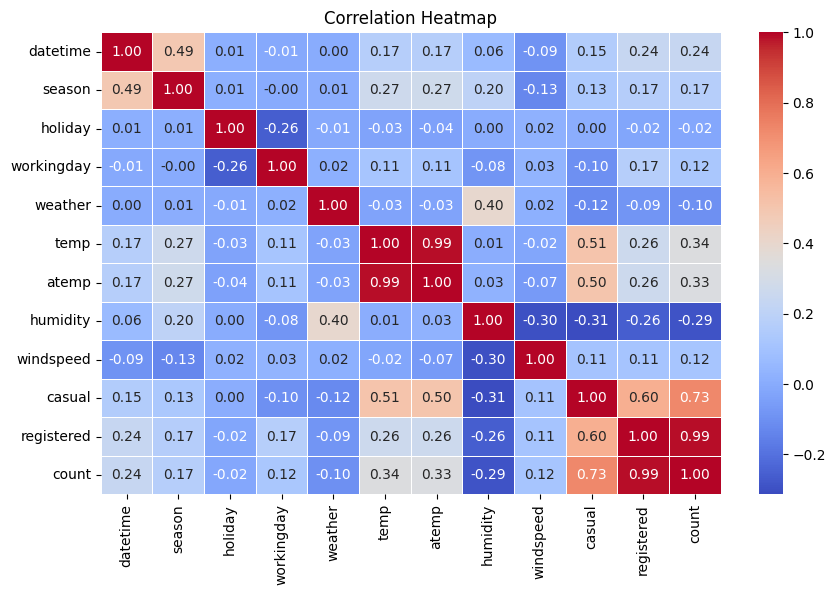

In [197]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### atemp and temp, registered and count. Are highly correlated. Dropping atemp and registered.

In [198]:
df.drop(columns=['atemp', 'registered'], inplace=True)


In [199]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1


### 1. Problem Statement:

## Checking the count of rentals on weekdays and weekends
## The null_hypothesis H0: There is no difference between the count of rentals on weekdays and weekends.
## The alternative_hypothesis H1: There is a difference between the count of rentals on weekdays and weekends.
## alpha= 0.05
## Need to check if p_value is less than alpha or not.


In [200]:
# Segregating the dataset in 2 groups, weekends rental count and weekdays rental count.

group_weekdays = df[df['workingday']==1]['count'] #for weekdays rental count
group_weekends = df[df['workingday']==0]['count'] #for weekends rental count

Text(0.5, 1.0, 'Weekends Rental Count')

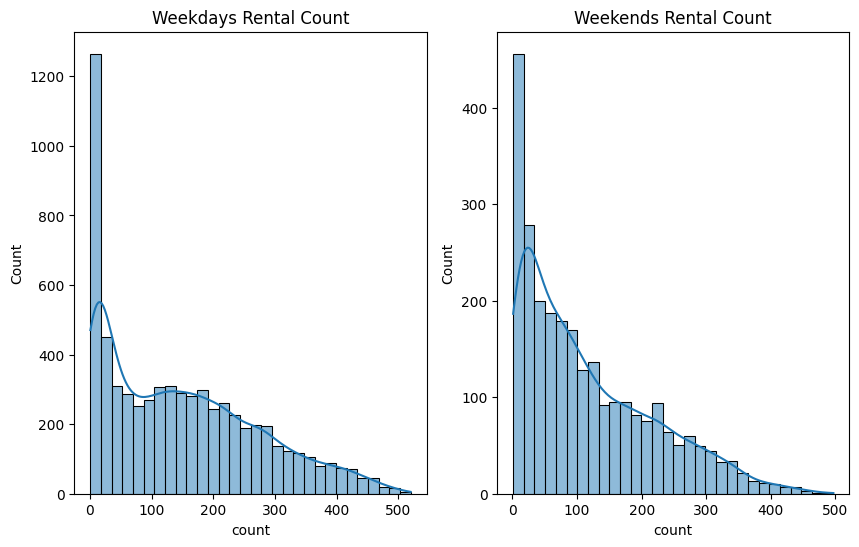

In [201]:
# Checking the data distribution for both the groups.

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(x=group_weekdays, bins=30, kde=True)
plt.title('Weekdays Rental Count')

plt.subplot(1,2,2)
sns.histplot(x=group_weekends, bins=30, kde=True)
plt.title('Weekends Rental Count')

### Both the data are not normally distributed according to the plots. Will be reconfirming via Shapiro test.


In [202]:
from scipy.stats import shapiro

In [203]:
np.round(shapiro(group_weekdays),2)

array([0.92, 0.  ])

In [204]:
np.round(shapiro(group_weekends),2)

array([0.9, 0. ])

### From the above plots and shapiro test, the data distribution is not normal. So to check whether rental counts are different on weekdays and weekends, we will be using 2-sample K-S test.


In [205]:
from scipy.stats import ks_2samp

In [206]:
# Checking the hypothesis

stat, p_value = ks_2samp(group_weekdays, group_weekends, alternative='greater')

print(f"K-S Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The two distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The two distributions are similar.")

K-S Statistic: 0.03896173475473441
P-Value: 0.003010116587593238
Reject the null hypothesis: The two distributions are significantly different.


### We are rejecting the null Hypothesis. Hence, the 2 distributions are indeed different.

## This indicates that on weekdays the usage of the rental bikes are more. The reason could be the need of commute for office.

### 2. Problem Stement:

## Checking the count of rentals on different weather conditions.
## The null_hypothesis H0: There is no difference between the count of rentals on different weather conditions.
## The alternative_hypothesis H1: There is a difference between the count of rentals on different weather conditions.
## alpha= 0.05
## Need to check if p_value is less than alpha or not.

In [207]:
# Checking different types of weather conditions.

df['weather'].nunique(), df['weather'].unique()

(4, array([1, 2, 3, 4]))

In [208]:
# 4 weather conditions are there, dividing the data in 4 groups.

group_1w=df[df['weather']==1]['count']
group_2w=df[df['weather']==2]['count']
group_3w=df[df['weather']==3]['count']
group_4w=df[df['weather']==4]['count']

Text(0.5, 1.0, 'Weather conditon-4 Rental Count')

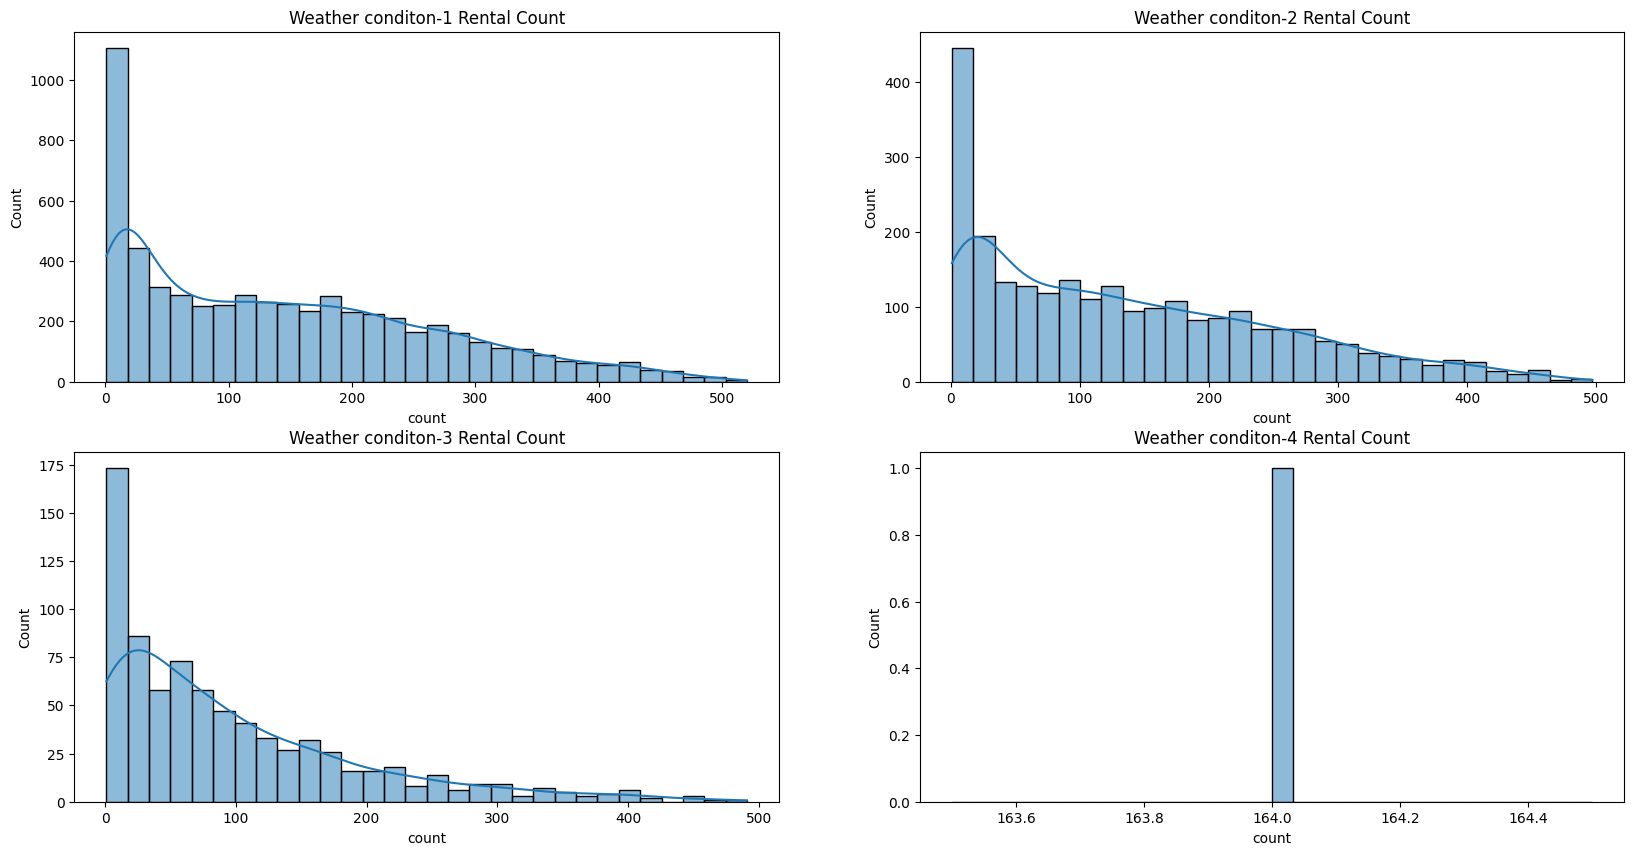

In [209]:
# Checking the data distribution for all the groups.

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(x=group_1w, bins=30, kde=True)
plt.title('Weather conditon-1 Rental Count')

plt.subplot(2,2,2)
sns.histplot(x=group_2w, bins=30, kde=True)
plt.title('Weather conditon-2 Rental Count')

plt.subplot(2,2,3)
sns.histplot(x=group_3w, bins=30, kde=True)
plt.title('Weather conditon-3 Rental Count')

plt.subplot(2,2,4)
sns.histplot(x=group_4w, bins=30, kde=True)
plt.title('Weather conditon-4 Rental Count')

### The above plots represent that all the groups are not normally distributed, will be doing other tests as well.

In [210]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [211]:
# Checking the distribution with shapiro test.

test_stat1, p_val1= shapiro(group_1w)
test_stat2, p_val2= shapiro(group_2w)
test_stat3, p_val3= shapiro(group_3w)
test_stat4, p_val4= shapiro(group_4w)

print("test_stat1:",test_stat1)
print("p_val1:",p_val1)
print("test_stat2:",test_stat2)
print("p_val2:",p_val2)
print("test_stat3:",test_stat3)
print("p_val3:",p_val3)
print("test_stat4:",test_stat4)
print("p_val4:",p_val4)

test_stat1: 0.9226175703385495
p_val1: 5.282658651467914e-48
test_stat2: 0.9188765159341223
p_val2: 1.0969295923127745e-34
test_stat3: 0.8507912892594773
p_val3: 1.469727216583398e-26
test_stat4: nan
p_val4: nan


## Shapiro test indicates the data is not normally distributes.
## Doing Levene's test now.

In [212]:
from scipy.stats import levene

# Performing Levene’s test
stat, p_value = levene(group_1w, group_2w, group_3w) #Not used group_4w because it is having only 1 value

print(f"Levene’s Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The variances are NOT equal (heteroscedasticity).")
else:
    print("Fail to reject the null hypothesis: The variances are equal (homoscedasticity).")


Levene’s Test Statistic: 60.90238592276982
P-Value: 5.2888058301313196e-27
Reject the null hypothesis: The variances are NOT equal (heteroscedasticity).


### Leven test also indicates that data is not normal.

## Will be using kruskal test to check our hypothesis.

In [213]:
from scipy.stats import kruskal

In [214]:

# Perform Kruskal-Wallis test
stat, p_value = kruskal(group_1w, group_2w, group_3w)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among the groups.")


Kruskal-Wallis Test Statistic: 109.81182210295523
P-Value: 1.4277948346476533e-24
Reject the null hypothesis: At least one group is significantly different.


### ALso performing one-way Anova test.

In [215]:
from scipy.stats import f_oneway

In [216]:
f_stats, p_value = f_oneway(group_1w, group_2w, group_3w)


# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among the groups.")


Reject the null hypothesis: At least one group is significantly different.


## Hence, it is proved that the rental counts of bikes are dependent on weather.

## The rental counts will be affected due to weather conditions, as YULU offers 2 wheeler. Its business is highly reliable on good weather conditions.

### 3. Problem Stement:

## Checking the count of rentals on different seasons.
## The null_hypothesis H0: There is no difference between the count of rentals on different seasons.
## The alternative_hypothesis H1: There is a difference between the count of rentals on different seasons.
## alpha= 0.05
## Need to check if p_value is less than alpha or not.


In [217]:
# Checking how many different seasons are there.

df['season'].unique()

array([1, 2, 3, 4])

In [218]:
#Segregating data into different groups of seasons.

group_1s=df[df['season']==1]['count']
group_2s=df[df['season']==2]['count']
group_3s=df[df['season']==3]['count']
group_4s=df[df['season']==4]['count']

Text(0.5, 1.0, 'Season-4 Rental Count')

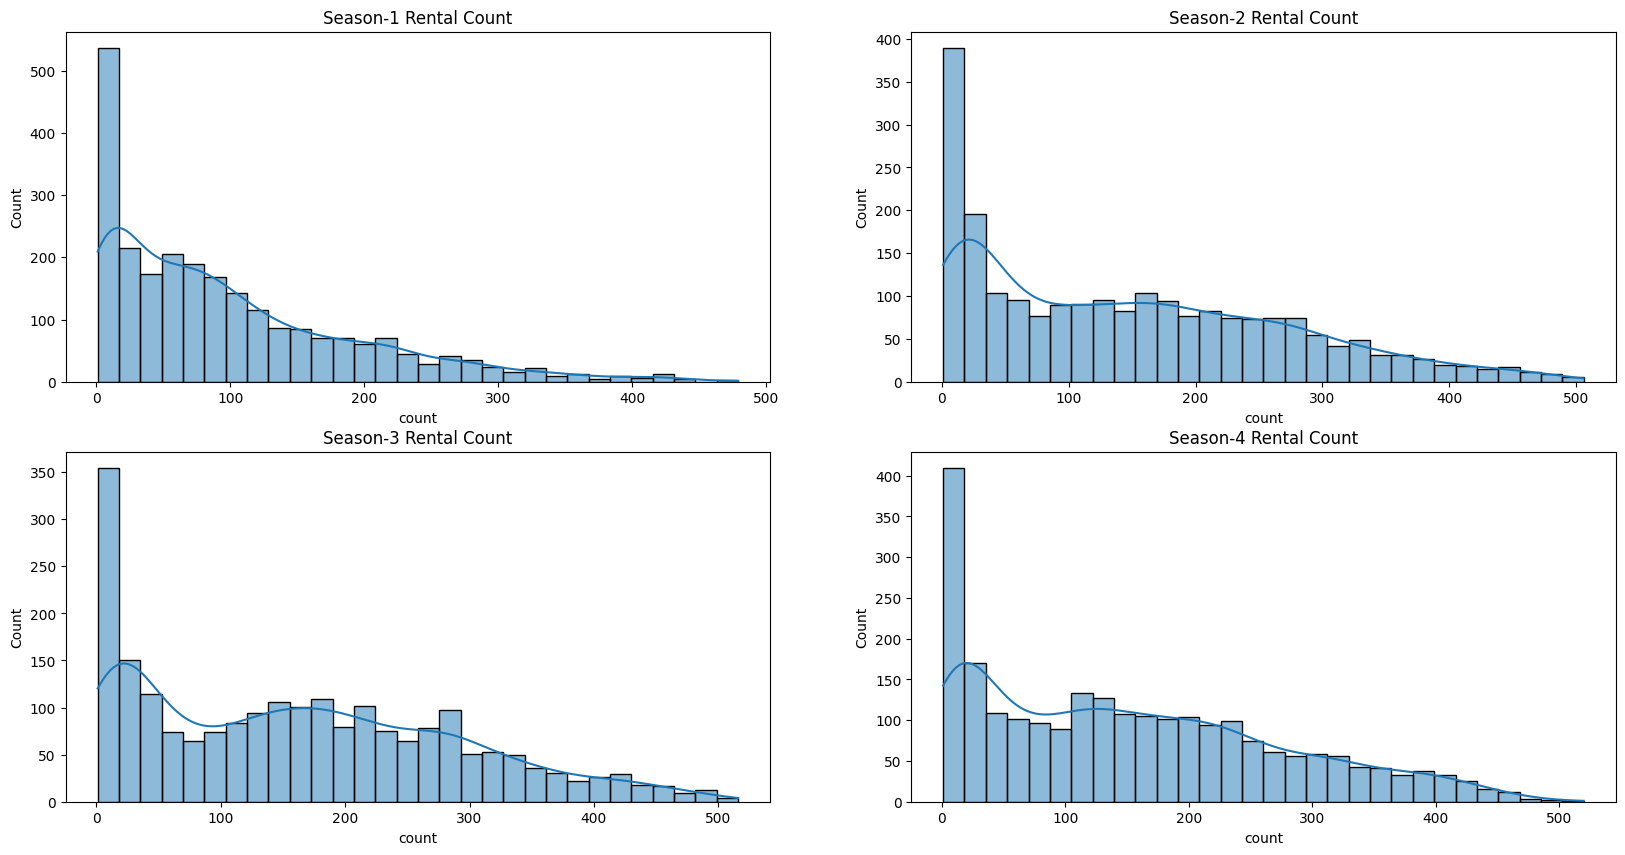

In [219]:
# Checking Normality of the data

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(x=group_1s, bins=30, kde=True)
plt.title('Season-1 Rental Count')

plt.subplot(2,2,2)
sns.histplot(x=group_2s, bins=30, kde=True)
plt.title('Season-2 Rental Count')

plt.subplot(2,2,3)
sns.histplot(x=group_3s, bins=30, kde=True)
plt.title('Season-3 Rental Count')

plt.subplot(2,2,4)
sns.histplot(x=group_4s, bins=30, kde=True)
plt.title('Season-4 Rental Count')

In [220]:
# Doing Shapiro Test


test_stat1, p_val1= shapiro(group_1s)
test_stat2, p_val2= shapiro(group_2s)
test_stat3, p_val3= shapiro(group_3s)
test_stat4, p_val4= shapiro(group_4s)

print("test_stat1:",test_stat1)
print("p_val1:",p_val1)
print("test_stat2:",test_stat2)
print("p_val2:",p_val2)
print("test_stat3:",test_stat3)
print("p_val3:",p_val3)
print("test_stat4:",test_stat4)
print("p_val4:",p_val4)

test_stat1: 0.8761562463735607
p_val1: 1.8008138040428327e-40
test_stat2: 0.9231810068716756
p_val2: 3.985707055935439e-32
test_stat3: 0.9373206340035054
p_val3: 2.2024962681340805e-29
test_stat4: 0.9321830656353188
p_val4: 1.0416082445264477e-31


## Shapiro test indicates the data is not normally distributes.
## Doing Levene's test now.

In [221]:
# Performing Levene’s test
stat, p_value = levene(group_1s, group_2s, group_3s, group_4s)

print(f"Levene’s Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The variances are NOT equal (heteroscedasticity).")
else:
    print("Fail to reject the null hypothesis: The variances are equal (homoscedasticity).")

Levene’s Test Statistic: 132.31837889951925
P-Value: 6.264588301056618e-84
Reject the null hypothesis: The variances are NOT equal (heteroscedasticity).


### Leven test also indicates that data is not normal.

## Will be using kruskal test to check our hypothesis.

In [222]:

# Perform Kruskal-Wallis test
stat, p_value = kruskal(group_1s, group_2s, group_3s, group_4s)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among the groups.")


Kruskal-Wallis Test Statistic: 386.178944540724
P-Value: 2.1815355496329382e-83
Reject the null hypothesis: At least one group is significantly different.


### ALso performing one-way Anova test.

In [223]:
f_stats, p_value = f_oneway(group_1s, group_2s, group_3s, group_4s)


# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among the groups.")


Reject the null hypothesis: At least one group is significantly different.


## Hence, it is proved that the rental counts of bikes are dependent on seasons.

## YULU offers 2 wheeler, so it is highly reliable on outside condition and its count can be affected with rain or cold season.

### 4. Problem Stement:

## Checking if the weather is different on different seasons.
## The null_hypothesis H0: There is no difference between weather conditions on different seasons.
## The alternative_hypothesis H1: There is a difference between weather conditions on different seasons.
## alpha= 0.05
## Need to check if p_value is less than alpha or not.


In [224]:
df1=df.copy()

In [225]:
df1 = df1[df1['weather'] != 4]  # This removes all rows where 'weather' is 4

# Remove column with weather = 4, as it can alter the result.



In [226]:
# To check this thesis, we will have to create the contingency table.

contingency_table=pd.crosstab(df1['weather'], df1['season'])

contingency_table

season,1,2,3,4
weather,,,,
1,1573,1398,1522,1460
2,682,601,486,730
3,202,202,171,210


In [227]:
from scipy.stats import chi2_contingency

In [228]:
# Perform the Chi-Square test
stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between weather and season ")
else:
    print("Fail to reject the null hypothesis: No significant difference between the weather and season")

Chi-Square Test Statistic: 46.47958928435939
P-Value: 2.376029423102834e-08
Reject the null hypothesis: There is a significant difference between weather and season 


## The above test proves that different seasons will often have different weathers.

## Season is not relied on weather, weather depends on the geolocation of the city. And weather can be affected with other environmental conditons.
